# Comprender las métricas de clasificación de ciencia de datos en Sci-kit Learn

Un área importante del modelado predictivo en ciencia de datos es la clasificación. La clasificación consiste en tratar de predecir de qué clase proviene una muestra particular de una población. Por ejemplo, si estamos tratando de predecir si un paciente en particular será re-hospitalizado, las dos clases posibles son hospitalizado (positivo) y no hospitalizado (negativo). Luego, el modelo de clasificación intenta predecir si cada paciente será hospitalizado o no. 

<img src="img/classification.png" alt="Drawing" style="width: 400px;"/>

A medida que entrene su modelo predictivo de clasificación, deseará evaluar qué tan bueno es. Curiosamente, hay muchas formas diferentes de evaluar el rendimiento. La mayoría de los científicos de datos que usan Python para el modelado predictivo usan el paquete Python llamado scikit-learn. Scikit-learn contiene muchas funciones integradas para analizar el rendimiento de los modelos.
En este tutorial, analizaremos algunas de estas métricas y escribiremos nuestras propias funciones desde cero para comprender las matemáticas detrás de algunas de ellas.

Este tutorial cubrirá las siguientes funciones de métricas de `sklearn.metrics` :

    - confusion_matrix
    
    - accuracy_score
    
    - recall_score
    
    - precision_score
    
    - f1_score
    
    - roc_curve
    
    - roc_auc_score

Aquí escribiremos nuestras propias funciones desde cero asumiendo una clasificación de dos clases.

Carguemos un conjunto de datos de muestra que tenga las etiquetas reales (real_label) y las probabilidades de predicción para dos modelos (model_RF y model_LR). Aquí las probabilidades son la probabilidad de ser de clase 1.

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


En la mayoría de los proyectos de ciencia de datos, definirá un umbral para definir qué probabilidades de predicción se etiquetan como predichas positivas versus predichas negativas. Por ahora supongamos que el umbral es 0.5. Agreguemos dos columnas adicionales que convierten las probabilidades en etiquetas predichas.

In [2]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


# confusion_matrix

Dada una etiqueta real y una etiqueta predicha, lo primero que podemos hacer es dividir nuestras muestras en 4 cubos:
    - True positive - actual = 1, predicted = 1
    - False positive - actual = 1, predicted = 0
    - False negative - actual = 0, predicted = 1
    - True negative - actual = 0, predicted = 0

Esto se pueden representar con la siguiente imagen (fuente original https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg) y haremos referencia a esta imagen en muchos de los cálculos a continuación.

<img src="img/buckets.png" alt="Drawing" style="width: 200px;"/>

O podemos representarlos con la matriz de confusion:

<img src="img/conf_matrix.png" alt="Drawing" style="width: 400px;"/>

Podemos obtener la matriz de confusión (como una matriz de 2x2) de scikit learn, que toma como entradas las etiquetas reales y las etiquetas predichas

In [3]:
#calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

donde había 5047 positivos verdaderos, 2360 falsos positivos, 2832 falsos negativos y 5519 verdaderos negativos. Definamos nuestras propias funciones para verificar `confusion_matrix`. 

In [4]:
def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))# your code here
def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))# your code here
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))# your code here

print('TP:',find_TP(df.actual_label.values, df.predicted_RF.values))
print('FN:',find_FN(df.actual_label.values, df.predicted_RF.values))
print('FP:',find_FP(df.actual_label.values, df.predicted_RF.values))
print('TN:',find_TN(df.actual_label.values, df.predicted_RF.values))

TP: 5047
FN: 2832
FP: 2360
TN: 5519


Escribamos una función que calcule los cuatro para nosotros, y otra función para duplicar `confusion_matrix`

In [5]:
import numpy as np
def find_conf_matrix_values(y_true,y_pred):
    # calculate TP, FN, FP, TN
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN
def my_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

In [6]:
my_confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

Verifiquemos que nuestras funciones hayan funcionado con las funciones incorporadas `array 'de Python y` array_equal` de numpy

In [7]:
assert  np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_RF.values),\
                       confusion_matrix(df.actual_label.values, df.predicted_RF.values) ), 'my_confusion_matrix() is not correct for RF'

assert  np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_LR.values),\
                       confusion_matrix(df.actual_label.values, df.predicted_LR.values) ), 'my_confusion_matrix() is not correct for LR'

Dados estos cuatro segmentos (TP, FP, FN, TN), podemos calcular muchas otras métricas de rendimiento.

# accuracy_score

La métrica más común para la clasificación es la precisión, que es la fracción de muestras predichas correctamente como se muestra a continuación:

<img src="img/accuracy.png" alt="Drawing" style="width: 400px;"/>

Podemos obtener la puntuación de precisión de scikit learn, que toma como entradas las etiquetas reales y las etiquetas predichas

In [8]:
#calcular el accuracy
from sklearn.metrics import accuracy_score

accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

In [9]:
#caclular el accuracy para los dos modelos (RF y LR)
print('Accuracy RF: %.3f'%(accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Accuracy LR: %.3f'%(accuracy_score(df.actual_label.values, df.predicted_LR.values)))

Accuracy RF: 0.671
Accuracy LR: 0.616


Usando accuracy como una métrica de rendimiento, el modelo RF es más preciso que el modelo LR. Entonces, ¿deberíamos parar aquí y decir que el modelo RF es el mejor modelo? ¡No! Accuracy no siempre es la mejor métrica para evaluar los modelos de clasificación. }

Por ejemplo, digamos que estamos tratando de predecir algo que solo ocurre 1 de cada 100 veces. Podríamos construir un modelo que obtenga un 99% de accuracy al decir que el evento nunca sucedió. Sin embargo, capturamos el 0% de los eventos que nos interesan. La medida del 0% aquí es otra métrica de rendimiento conocida como recuperación.

# recall_score

Recall (también conocida como sensibilidad) es la fracción de eventos positivos que predijo correctamente como se muestra a continuación:

<img src="img/recall.png" alt="Drawing" style="width: 300px;"/>

Podemos obtener el puntaje de precisión de scikit-learn, que toma como entradas las etiquetas reales y las etiquetas predichas

In [10]:
# calcular el recall
from sklearn.metrics import recall_score

recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

In [11]:
# calcular el recall para los dos modelos

print('Recall RF: %.3f'%(recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall LR: %.3f'%(recall_score(df.actual_label.values, df.predicted_LR.values)))

Recall RF: 0.641
Recall LR: 0.543


Un método para aumentar el recall es aumentar la cantidad de muestras que define como positivas predichas al reducir el umbral para las predicciones positivas. Desafortunadamente, esto también aumentará el número de falsos positivos. Otra métrica de rendimiento llamada precisión tiene esto en cuenta.

# precision_score

La precisión es la fracción de eventos positivos pronosticados que en realidad son positivos como se muestra a continuación:

<img src="img/precision.png" alt="Drawing" style="width: 300px;"/>

Podemos obtener el puntaje de precisión de scikit-learn, que toma como entradas las etiquetas reales y las etiquetas predichas

In [12]:
# calcular el recall

from sklearn.metrics import precision_score

precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

In [13]:
# calcular la precisión para los dos modelos

print('Precision RF: %.3f'%(precision_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision LR: %.3f'%(precision_score(df.actual_label.values, df.predicted_LR.values)))

Precision RF: 0.681
Precision LR: 0.636


En este caso, parece que el modelo RF es mejor tanto en el recall como en la precisión. Pero, ¿qué haría si un modelo fuera mejor en el recall y el otro fuera mejor en la precisión? Un método que utilizan algunos científicos de datos se llama la puntuación F1.

# f1_score

El f1-score es la media armónica de recuerdo y precisión, con una puntuación más alta como mejor modelo. La puntuación de f1 se calcula utilizando la siguiente fórmula:

<img src="img/f1_score.png" alt="Drawing" style="width: 400px;"/>

Podemos obtener el f1-score de scikit-learn, que toma como entradas las etiquetas reales y las etiquetas predichas

In [14]:
#calcular el f1-score para los dos modelos
from sklearn.metrics import f1_score

f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

In [15]:
print('F1 RF: %.3f'%(f1_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 LR: %.3f'%(f1_score(df.actual_label.values, df.predicted_LR.values)))

F1 RF: 0.660
F1 LR: 0.586


Hasta ahora, hemos asumido que definimos un umbral de 0.5 para seleccionar qué muestras se predicen como positivas. Si cambiamos este umbral, las métricas de rendimiento cambiarán. Como se muestra abajo:

In [16]:
print('scores with threshold = 0.5')
print('Accuracy RF: %.3f'%(accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF: %.3f'%(recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF: %.3f'%(precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(f1_score(df.actual_label.values, df.predicted_RF.values)))
print(' ')
print('scores with threshold = 0.25')
print('Accuracy RF: %.3f'%(accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('F1 RF: %.3f'%(f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))



scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660
 
scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


¿Cómo evaluamos un modelo si no hemos elegido un umbral? Un método muy común es utilizar la curva ROC.

# roc_curve and roc_auc_score

Laa curvas ROC son MUY útiles para comprender el equilibrio entre la tasa de verdadero positivo y las tasas de falso positivo. Sci-kit learn ha incorporado funciones para curvas ROC y para analizarlas. Las entradas a estas funciones (`roc_curve` y` roc_auc_score`) son las etiquetas reales y las probabilidades predichas (no las etiquetas predichas). Tanto `roc_curve` como` roc_auc_score` son funciones complicadas, por lo que no tendremos que escribir estas funciones desde cero. En cambio, le mostraremos cómo usar las funciones de aprendizaje de sci-kit y le explicaremos los puntos clave. Comencemos usando `roc_curve` para hacer el diagrama ROC.

In [17]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

La función `roc_curve` devuelve tres listas:

    - thresholds = all unique prediction probabilities in descending order
    
    - fpr = the false positive rate (FP / (FP+TN)) for each threshold
    
    - tpr = the true positive rate  (TP / (TP+FN)) (i.e. recall) for each threshold

In [18]:
thresholds_RF

array([1.93052053, 0.93052053, 0.82363091, ..., 0.25654616, 0.25587275,
       0.17142947])

In [19]:
fpr_RF

array([0.       , 0.       , 0.       , ..., 0.9941617, 0.9941617,
       1.       ])

In [20]:
tpr_RF

array([0.00000000e+00, 1.26919660e-04, 5.33062571e-03, ...,
       9.99873080e-01, 1.00000000e+00, 1.00000000e+00])

Podemos trazar la curva ROC para cada modelo como se muestra a continuación.

In [21]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

Hay un par de cosas que podemos observar de esta figura.

    - Un modelo que adivina aleatoriamente la etiqueta dará como resultado la línea negra y desea tener un modelo que tenga una curva sobre esta línea negra.
    
    - Un ROC que está más lejos de la línea negra es mejor, por lo que RF (rojo) se ve mejor que LR (azul).
    
    - Aunque no se ve directamente, un umbral alto da como resultado un punto en la parte superior derecha y un umbral bajo da como resultado un punto en la parte inferior izquierda. Esto significa que a medida que aumenta el umbral, obtiene un TPR más alto a un costo de FPR más alto.

Para analizar el rendimiento, utilizaremos la métrica de área bajo curva.

In [22]:
from sklearn.metrics import roc_auc_score

auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)

print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


Como puede ver, el área debajo de la curva para el modelo RF es mejor que la LR.

Cuando trazo la curva ROC, me gusta agregar el AUC a la leyenda como se muestra a continuación. 

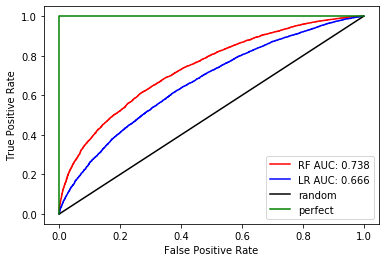

In [23]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusiones

En el análisis predictivo, al decidir entre dos modelos es importante elegir la mejor  o mejores métrica de rendimiento en relación a la naturaleza del problema. Como puede ver aquí, hay muchos entre los que puede elegir (precisión, recuperación, precisión, puntaje f1, AUC, etc.). En última instancia, debe utilizar la métrica de rendimiento más adecuada para el problema comercial en cuestión. Muchos científicos de datos prefieren usar el AUC porque no requiere la selección de un umbral y ayuda a equilibrar la tasa positiva verdadera y la tasa falsa positiva.

## **EXTRA**
**Curva ROC y curva presicion-recall (PR)**

- Las curvas ROC resumen la compensación entre la tasa positiva verdadera y la tasa positiva falsa para un modelo predictivo que utiliza diferentes umbrales de probabilidad.
- Las curvas de presicion-recall resumen la compensación entre la tasa positiva verdadera y el valor predictivo positivo para un modelo predictivo utilizando diferentes umbrales de probabilidad.
- Las curvas ROC son apropiadas cuando las observaciones están equilibradas entre cada clase, mientras que las curvas de recuperación de precisión son apropiadas para conjuntos de datos desequilibrados.

La curva PR es el resultado de dibujar la gráfica entre el precision y el recall. Esta gráfica nos permite ver a partir de qué recall tenemos una degradación de la precisión y viceversa. Lo ideal sería una curva que se acerque lo máximo posible a la esquina superior derecha (alta precisión y alto recall)

![](img/pr.png)

En en título del gráfico vemos AP=0.62. Este valor es el Average precision y es una manera de calcular el área bajo la curva PR o PR AUC, o lo que es lo mismo, el resultado de integrar la curva. El Average Precision nos sirve para evaluar y comparar el rendimiento de modelos. Cuanto más se acerque su valor a 1, mejor será nuestro modelo.

**Diferencias entre curvas ROC y PR**

Por lo general, usaremos la curva PR o el Average Precision cuando tengamos problemas de datasets no balanceados, es decir, cuando la clase positiva ocurre pocas veces. Cuando hay pocos ejemplos positivos, la curva ROC o el ROC AUC puede dar un valor alto, sin embargo, la curva PR estará lejos de su valor óptimo, poniendo de manifiesto un indicador de precisión relacionado con la baja probabilidad de la clase positiva.
Será una opción interesante usar la curva ROC y el ROC AUC cuando tengamos un dataset más balanceado o queramos poner de manifiesto un indicador más relacionado con falsas alarmas (falsos positivos).
